<a href="https://colab.research.google.com/github/Omarnot2far/End-to-End-DataScience-project-internship/blob/main/EDA/%20TimeSeries/Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Collect/Web Scraping

In [3]:

from bs4 import BeautifulSoup
import requests
import pandas as pd

# Define the URL pattern
url_pattern = 'https://www.airlinequality.com/airline-reviews/british-airways/page/{}/'

# Initialize empty lists to store the data
data = []

# Loop through all the pages
for page in range(1, 101):
    # Make a request to the webpage
    url = url_pattern.format(page)
    response = requests.get(url)
    
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all the reviews on the page
    reviews = soup.find_all('article', {'itemtype': 'http://schema.org/Review'})
    
    # Loop through the reviews and extract the data
    for review in reviews:
        rating = review.find('span', {'itemprop': 'ratingValue'}).text
        headline = review.find('h2', class_='text_header').text
        author = review.find('span', {'itemprop': 'author'}).text
        time = review.find('time', {'itemprop': 'datePublished'}).text
        location = review.find('h3', class_='text_sub_header userStatusWrapper').text
        content = review.find('div', class_='text_content').text

        data.append({'rating': rating, 'headline': headline, 'author' : author, 'time': time, 'location': location, 'content': content})

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data, columns=['rating', 'headline', 'author', 'time', 'location', 'content'])
print(df)

    rating                                  headline              author  \
0        1          "most appalling airline service"           \nC Peale   
1        1            "Customer service is shocking"     \nJason Wickert   
2        1                     "Avoid this airline"          \nS Dasirou   
3        2         "a lot of actual lies being told"  \nAlexander George   
4        5  "premium price for very average service"           \nG Jones   
..     ...                                       ...                 ...   
995      1               "first and last experience"           \nH Reyes   
996      1       "charged £65 to bring my bike back"        \nMark Howes   
997      1          "queue for bag drop was massive"            \nL Wang   
998      1                       "they did not care"        \nDavid Moss   
999      8           "always had a great experience"   \nKirsten Durward   

                time                                           location  \
0       8th 

In [4]:
df.head()

,rating,headline,author,time,location,content
0,1,"""most appalling airline service""",\nC Peale,8th May 2023,\n\nC Peale (Australia) 8th May 2023,✅ Trip Verified | I will never travel with Br...
1,1,"""Customer service is shocking""",\nJason Wickert,6th May 2023,\n\nJason Wickert (United Kingdom) 6th May 2023,✅ Trip Verified | I am already in Portugal so...
2,1,"""Avoid this airline""",\nS Dasirou,6th May 2023,\n\nS Dasirou (United Kingdom) 6th May 2023,✅ Trip Verified | Terrible. Avoid this airlin...
3,2,"""a lot of actual lies being told""",\nAlexander George,1st May 2023,\n\nAlexander George (United Kingdom) 1st May ...,✅ Trip Verified | Despite being a gold member...
4,5,"""premium price for very average service""",\nG Jones,28th April 2023,\n\nG Jones (United Kingdom) 28th April 2023,Not Verified | Regarding the aircraft and seat...


# Data Cleaning

In [5]:
# import re: This imports the Python regular expression module,
import re
# str.extract() method to extract text from each element in the 'location' column using a regular expression
df['location_info'] = df['location'].str.extract(r'\((.*?)\)', expand=False)
df = df.drop('location', axis=1)

In [6]:
# drop \n from columns
df = df.replace({'author': '\n', 'location': '\n', 'content': '\n'}, '', regex=True)

In [7]:
# change datatype using astype function
df['rating'] = df['rating'].astype(float)
df['time'] = pd.to_datetime(df['time'])

In [8]:
# split content columns 

df[['trip_varified', 'content']] = df['content'].str.split('|', expand=True)

In [9]:
# distinguish True or False based on the ✅ Trip Verified 
df['trip_verified'] = df['trip_varified'].str.contains('✅ Trip Verified')
df['trip_verified'] = df['trip_verified'].astype(bool)
df = df.drop('trip_varified', axis=1)


In [10]:
# drop " " from headline text
df['headline'] = df['headline'].str.replace('"', '')

In [11]:
df.head()

,rating,headline,author,time,content,location_info,trip_verified
0,1.0,most appalling airline service,C Peale,2023-05-08,I will never travel with British Airways aga...,Australia,True
1,1.0,Customer service is shocking,Jason Wickert,2023-05-06,I am already in Portugal so contacted them t...,United Kingdom,True
2,1.0,Avoid this airline,S Dasirou,2023-05-06,Terrible. Avoid this airline. It’s now becom...,United Kingdom,True
3,2.0,a lot of actual lies being told,Alexander George,2023-05-01,"Despite being a gold member, the British Air...",United Kingdom,True
4,5.0,premium price for very average service,G Jones,2023-04-28,Regarding the aircraft and seat: The business...,United Kingdom,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rating         1000 non-null   float64       
 1   headline       1000 non-null   object        
 2   author         1000 non-null   object        
 3   time           1000 non-null   datetime64[ns]
 4   content        1000 non-null   object        
 5   location_info  1000 non-null   object        
 6   trip_verified  1000 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(4)
memory usage: 48.0+ KB


In [26]:
df.to_csv('BA_data.csv', index=False)

# Explotorary Data Analysis

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set_style('darkgrid')

# Distribution of Ratings

<Axes: title={'center': 'Distribution of Ratings'}>

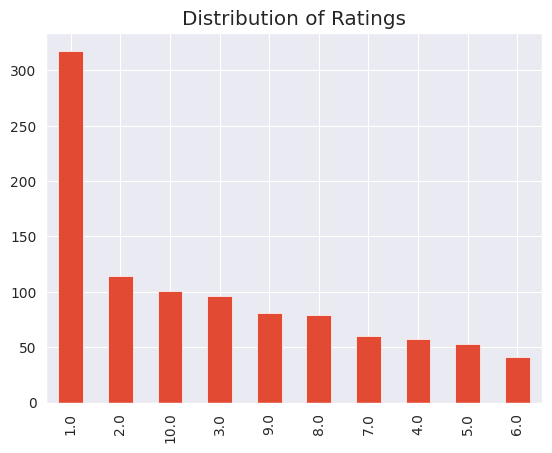

In [14]:

df['rating'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Distribution of Ratings')


**Top 10 Countries by Number of Reviews**

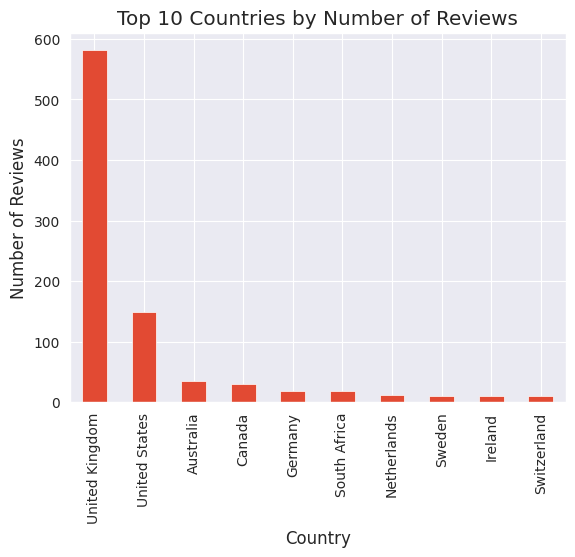

In [15]:
top_10 = df['location_info'].value_counts().nlargest(10)
top_10.plot(kind='bar')
plt.title('Top 10 Countries by Number of Reviews')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.show()


**Top 10 Countries by Average Rating**

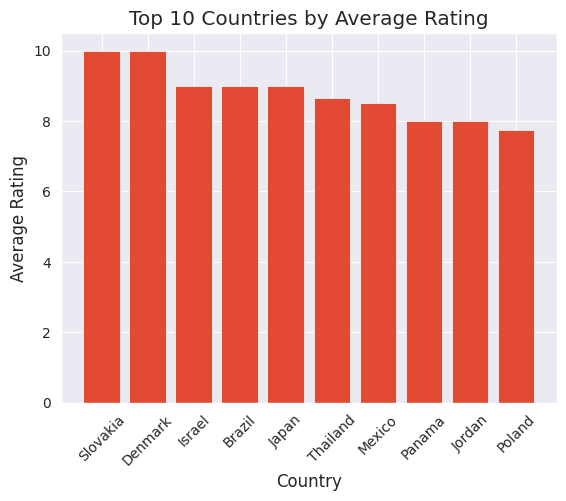

In [16]:
# Group the data by country and calculate the mean rating for each group
avg_ratings_by_country = df.groupby('location_info')['rating'].mean().sort_values(ascending=False)

# Plot the top 10 countries by average rating
top_10_countries = avg_ratings_by_country.head(10)
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Average Rating')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.show()


**Count of Trip Verified and Non-Verified Reviews by Rating**

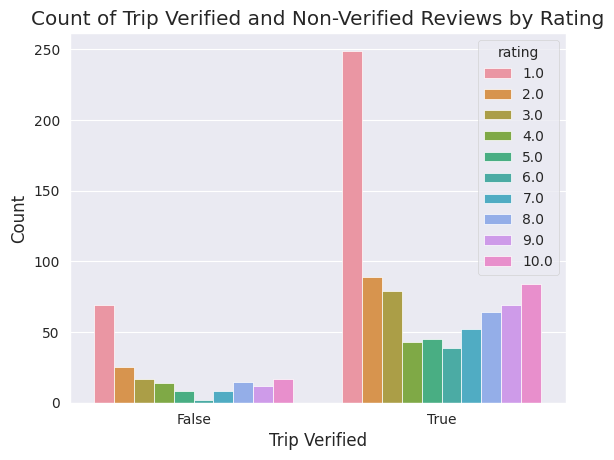

In [17]:
# Plot the count of trip verified and non-verified reviews based on the rating
ax = sns.countplot(data=df, x='trip_verified', hue='rating')

# Set the title and axis labels
ax.set_title('Count of Trip Verified and Non-Verified Reviews by Rating')
ax.set_xlabel('Trip Verified')
ax.set_ylabel('Count')

# Show the plot
plt.show()

# Time Series Analysis

In [18]:
import plotly.express as px
fig = px.line(df, x='time', y="rating")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4yu9pff3/ugia1s5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4yu9pff3/ge7qi43u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46132', 'data', 'file=/tmp/tmp4yu9pff3/ugia1s5_.json', 'init=/tmp/tmp4yu9pff3/ge7qi43u.json', 'output', 'file=/tmp/tmp4yu9pff3/prophet_modelijfktg8x/prophet_model-20230511053258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:32:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:32:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


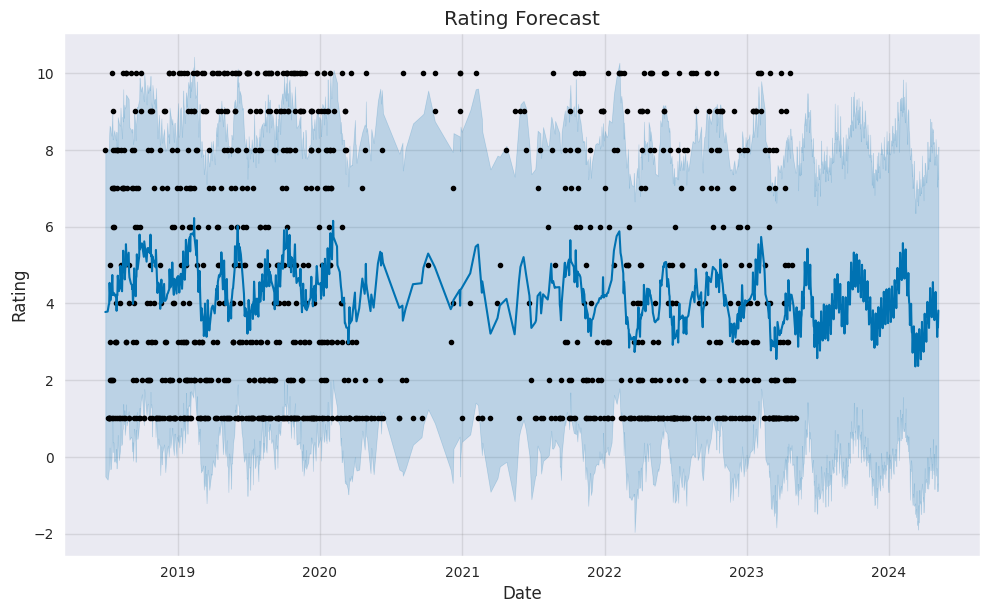

In [19]:
from prophet import Prophet

# Preprocess data for Prophet
df_prophet = df[['time', 'rating']]
# renaming the columns as ds and y, ds for time series data and y for the dependent variable.
df_prophet.columns = ['ds', 'y']

# Create Prophet model
model = Prophet()

# Fit model on data
model.fit(df_prophet)

# Generate future dates
future_dates = model.make_future_dataframe(periods=365)

# Predict ratings for future dates
forecast = model.predict(future_dates)

# Visualize forecast
fig = model.plot(forecast, xlabel='Date', ylabel='Rating')
plt.title('Rating Forecast')
plt.show()

# Sentiment Analysis

We can use a pre-trained sentiment analysis model such as the TextBlob library to perform sentiment analysis on the reviews. TextBlob calculates a polarity score for each review, which ranges from -1 (negative) to 1 (positive).

In [20]:
from textblob import TextBlob

# Define a function to calculate the polarity score for a given text
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the 'content' column and add the results to a new column called 'polarity'
df['polarity'] = df['content'].apply(get_sentiment)


In [21]:
df

,rating,headline,author,time,content,location_info,trip_verified,polarity
0,1.0,most appalling airline service,C Peale,2023-05-08,I will never travel with British Airways aga...,Australia,True,-0.059510
1,1.0,Customer service is shocking,Jason Wickert,2023-05-06,I am already in Portugal so contacted them t...,United Kingdom,True,-0.450000
2,1.0,Avoid this airline,S Dasirou,2023-05-06,Terrible. Avoid this airline. It’s now becom...,United Kingdom,True,0.005000
3,2.0,a lot of actual lies being told,Alexander George,2023-05-01,"Despite being a gold member, the British Air...",United Kingdom,True,0.038636
4,5.0,premium price for very average service,G Jones,2023-04-28,Regarding the aircraft and seat: The business...,United Kingdom,False,-0.031277
...,...,...,...,...,...,...,...,...
995,1.0,first and last experience,H Reyes,2018-07-09,"Had four flights in total with this airline,...",Ireland,True,0.001515
996,1.0,charged £65 to bring my bike back,Mark Howes,2018-07-09,Johannesburg to Heathrow. British Airways ar...,United Kingdom,True,-0.062500
997,1.0,queue for bag drop was massive,L Wang,2018-07-08,The queue for bag drop was massive and did n...,United Kingdom,True,0.143214
998,1.0,they did not care,David Moss,2018-07-05,British Airways changed plane and consequent...,United Kingdom,True,-0.103125


# Word Cloud

A word cloud is a visualization of the most frequent words in a given text. We can use the WordCloud library to create a word cloud from the reviews.

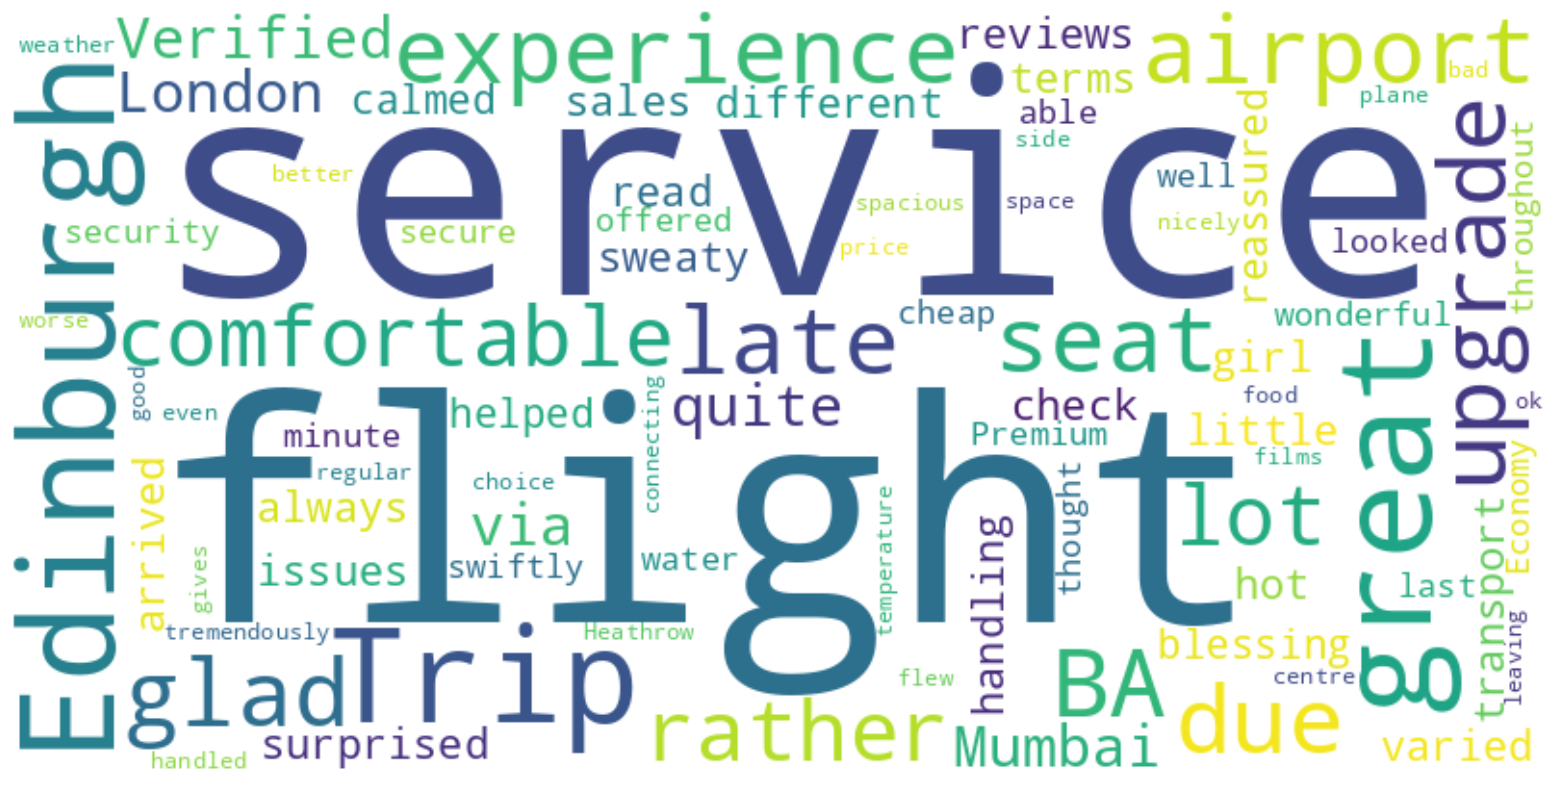

In [24]:
from wordcloud import WordCloud

# Join all the reviews into a single string
all_reviews = ' '.join(df['content'])

# Create a word cloud from the reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(content)

# Display the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
